In [113]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [114]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mathchi/diabetes-data-set")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/mathchi/diabetes-data-set/versions/1


In [115]:
import os

In [116]:
for filename in os.listdir(path):
    if filename.endswith(".csv"):
        csv_file_path = os.path.join(path, filename)
        break

In [117]:
diabetes = pd.read_csv(csv_file_path)


In [118]:
diabetes.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


In [119]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [120]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [121]:
pd.isnull(diabetes).sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


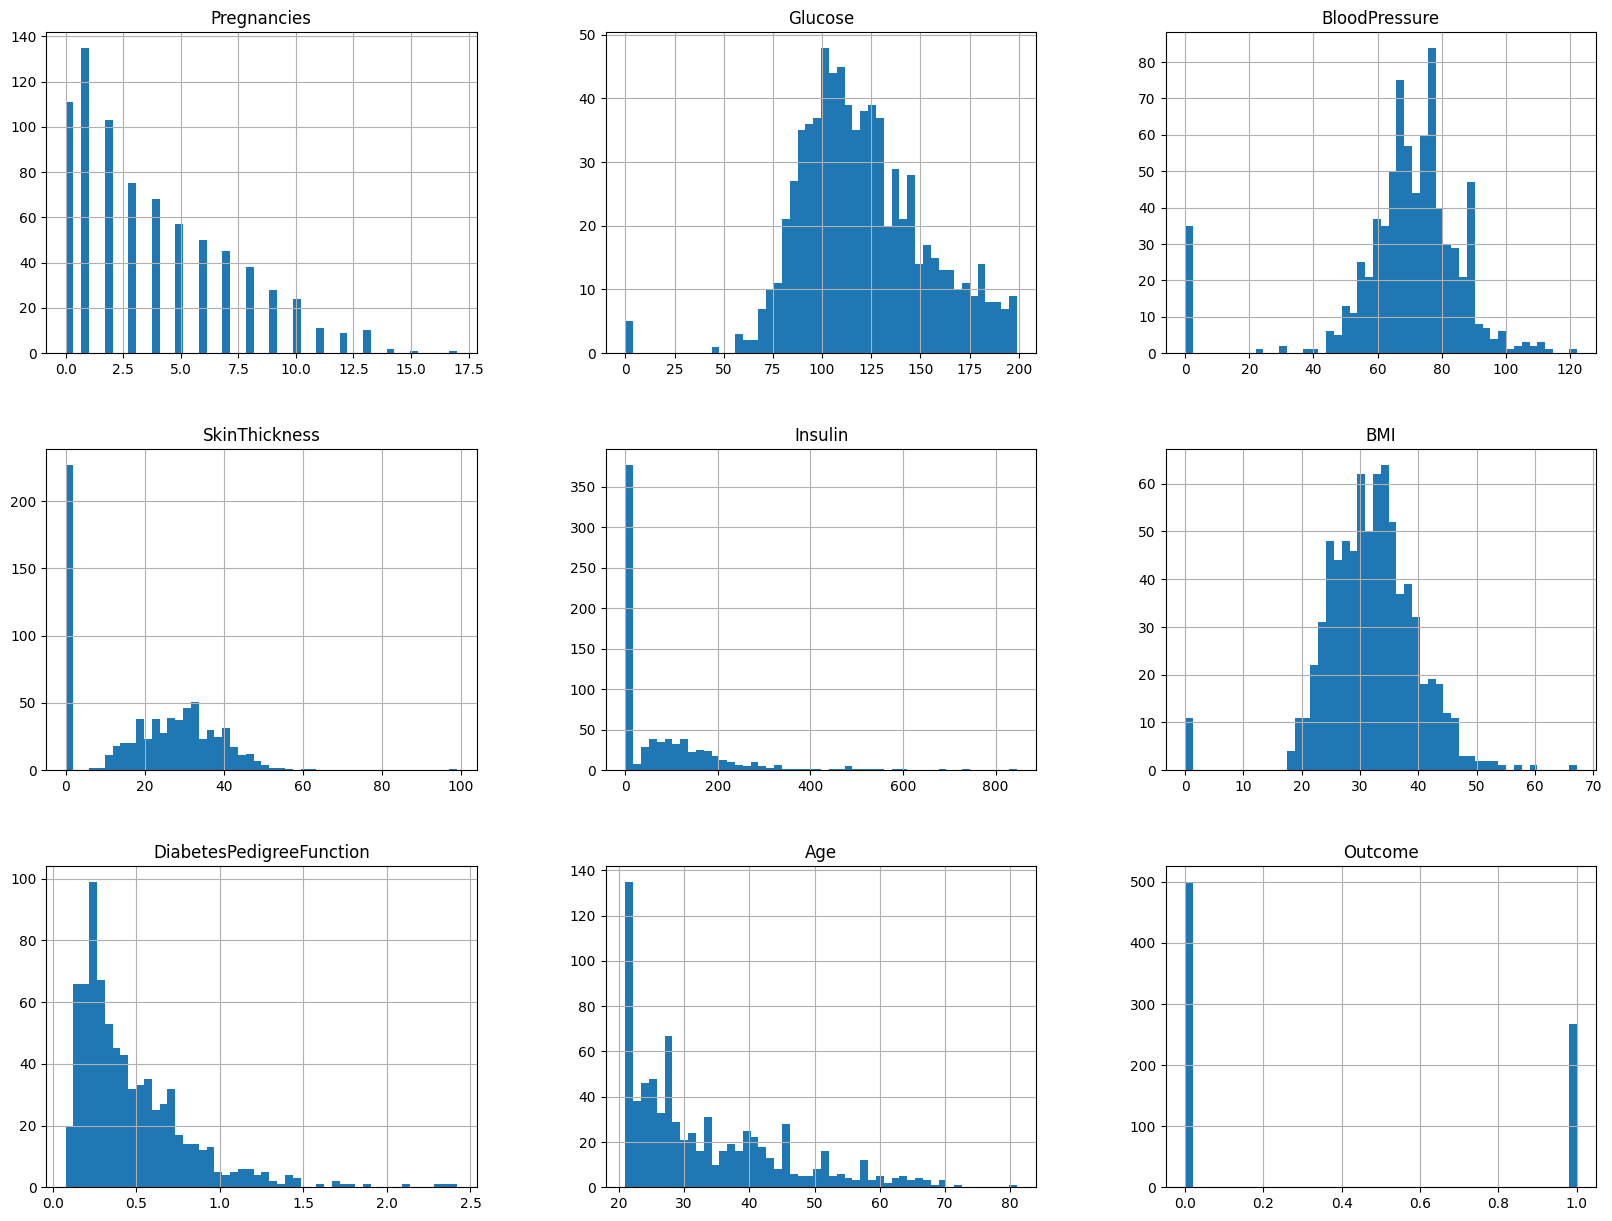

In [122]:
diabetes.hist(bins=50, figsize=(20,15))
plt.show()

In [123]:
diabetes['age']= pd.cut(diabetes['Age'],
                          bins= [0,15,30,45,np.inf],
                          labels= [1,2,3,4])

In [124]:
from sklearn.model_selection import StratifiedShuffleSplit

In [125]:
splitter= StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
strat_splits=[]
for train_index, test_index in splitter.split(diabetes, diabetes['age']):
    strat_train_set= diabetes.loc[train_index]
    strat_test_set= diabetes.loc[test_index]
    strat_splits.append((strat_train_set, strat_test_set))

In [126]:
for set in (strat_train_set, strat_test_set):
    set.drop("age", axis=1, inplace=True)

In [127]:
strat_train_set.shape, strat_test_set.shape

((614, 9), (154, 9))

In [128]:
diabetes= strat_train_set.copy()

## Correlation

In [129]:
from pandas.plotting import scatter_matrix

In [130]:
diabetes.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

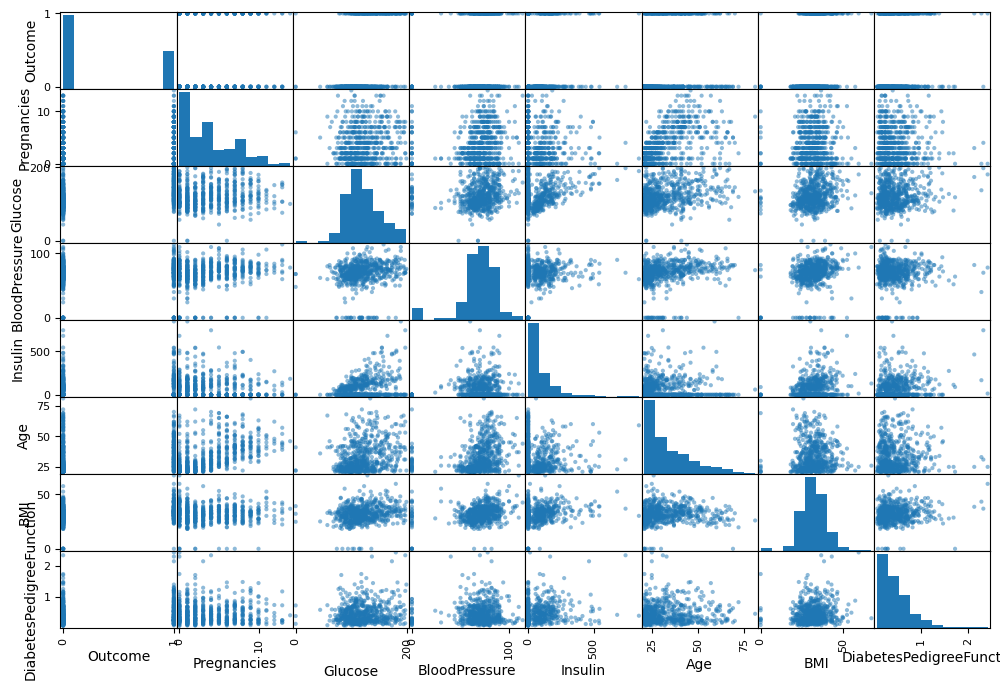

In [131]:
attributes= ['Outcome','Pregnancies', 'Glucose', 'BloodPressure', 'Insulin', 'Age', 'BMI', 'DiabetesPedigreeFunction']
scatter_matrix(diabetes[attributes], figsize=(12,8))
plt.show()

In [132]:
diabetes_corr= diabetes.corr()

In [133]:
diabetes_corr['Outcome'].sort_values(ascending=False)

,Outcome
Outcome,1.000000
Glucose,0.459465
BMI,0.295556
Age,0.213275
Pregnancies,0.190832
DiabetesPedigreeFunction,0.149675
Insulin,0.100332
BloodPressure,0.043238
SkinThickness,0.039268


In [134]:
diabetes= strat_train_set.drop("Outcome", axis=1)
diabetes_training_labels= strat_train_set["Outcome"].copy()

In [135]:
diabetes.shape, diabetes_training_labels.shape

((614, 8), (614,))

## Custom Transformation

##Feature Scaling

In [136]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [137]:
num_pipeline= Pipeline([
    ('std_scaler', StandardScaler()),
])

In [138]:
new_diabetes= num_pipeline.fit_transform(diabetes)

## Model Selection

In [139]:
new_diabetes.shape

(614, 8)

In [140]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [141]:
from sklearn.pipeline import make_pipeline

In [142]:
model_reg= make_pipeline(num_pipeline, LogisticRegression())


In [143]:
model_reg.fit(diabetes, diabetes_training_labels)

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('std_scaler', StandardScaler())])),
                ('logisticregression', LogisticRegression())])

In [144]:
log_reg_pred= model_reg.predict(diabetes)

In [145]:
log_reg_pred[:5]

array([0, 1, 0, 0, 0])

In [146]:
diabetes_training_labels[:5].values

array([0, 1, 0, 1, 0])

In [147]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [148]:
log_reg_acc= accuracy_score(diabetes_training_labels, log_reg_pred)

In [149]:
log_reg_acc

0.7850162866449512

#The accuracy score of the Logistic regression came out to be 78%.

In [150]:
from sklearn.svm import SVC

In [151]:
model_svc= make_pipeline(num_pipeline, SVC())

In [152]:
model_svc.fit(diabetes, diabetes_training_labels)

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('std_scaler', StandardScaler())])),
                ('svc', SVC())])

In [153]:
svc_pred= model_svc.predict(diabetes)

In [154]:
svc_pred[:5]

array([0, 1, 0, 1, 0])

In [155]:
diabetes_training_labels[:5].values

array([0, 1, 0, 1, 0])

In [156]:
svc_acc= accuracy_score(diabetes_training_labels, svc_pred)

In [157]:
svc_acc

0.8355048859934854

## Well this looks promishing the SVM classifier gives better score than that of logistic i.e 83%.

In [158]:
coff_matrix_svm=confusion_matrix(diabetes_training_labels, svc_pred)

In [159]:
coff_matrix_svm

array([[378,  27],
       [ 74, 135]])

##Summary of Metrics:
Accuracy: 83.5%
Precision: 83.3%
Recall: 64.6%
F1-Score: 73.4%

In [160]:
class_report_svm= classification_report(diabetes_training_labels, svc_pred)

In [161]:
class_report_svm

'              precision    recall  f1-score   support\n\n           0       0.84      0.93      0.88       405\n           1       0.83      0.65      0.73       209\n\n    accuracy                           0.84       614\n   macro avg       0.83      0.79      0.80       614\nweighted avg       0.84      0.84      0.83       614\n'